# **EDA DataSet de IMDB & TMDB**:

## Primeros Pasos de nuestro EDA.

In [2]:
# ============================================
# 0. INSTALACIÓN Y CARGA DE LIBRERÍAS
# ============================================

install.packages(c("tidyverse", "ggplot2", "dplyr", "readr",
                   "stringr", "lubridate", "scales", "corrplot",
                   "skimr", "gridExtra"))

library(tidyverse)
library(ggplot2)
library(dplyr)
library(readr)
library(stringr)
library(lubridate)
library(scales)
library(corrplot)
library(skimr)
library(gridExtra)

cat("Librerías cargadas correctamente\n")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Librerías cargadas correctamente


In [3]:
# ============================================
# 1. IMPORTACIÓN DEL DATASET
# ============================================

cat("\n")
cat("============================================================\n")
cat("                 1. IMPORTACIÓN DEL DATASET                 \n")
cat("============================================================\n\n")

movies <- read_csv("IMDB TMDB Movie Metadata Big Dataset (1M).csv",
                   show_col_types = FALSE,
                   n_max = 100000)

cat("Dataset cargado correctamente\n")
cat(paste("Dimensiones:", nrow(movies), "filas x", ncol(movies), "columnas\n\n"))



                 1. IMPORTACIÓN DEL DATASET                 

Dataset cargado correctamente
Dimensiones: 100000 filas x 42 columnas



In [4]:
# ============================================
# 2. LIMPIEZA Y NORMALIZACIÓN DEL DATASET
# ============================================

cat("============================================================\n")
cat("             2. LIMPIEZA Y NORMALIZACIÓN DE DATOS           \n")
cat("============================================================\n\n")

# 2.1 Normalización de géneros (MEJORADA)
cat("Normalizando géneros de películas...\n")

normalizar_genero <- function(genero) {
  # Eliminar comillas simples y dobles
  genero <- gsub("'", "", genero)
  genero <- gsub('"', "", genero)
  genero <- gsub("\\[", "", genero)
  genero <- gsub("\\]", "", genero)

  # Trim y convertir a minúsculas para comparar
  genero <- str_trim(genero)
  genero_lower <- tolower(genero)

  # Mapeo exhaustivo a géneros estándar
  genero_norm <- case_when(
    genero_lower %in% c("drama", "dramas") ~ "Drama",
    genero_lower %in% c("comedy", "comedies", "comedia") ~ "Comedy",
    genero_lower %in% c("thriller", "thrillers") ~ "Thriller",
    genero_lower %in% c("action", "acción") ~ "Action",
    genero_lower %in% c("horror", "terror") ~ "Horror",
    genero_lower %in% c("adventure", "aventura") ~ "Adventure",
    genero_lower %in% c("crime", "crimen") ~ "Crime",
    genero_lower %in% c("fantasy", "fantasía") ~ "Fantasy",
    genero_lower %in% c("mystery", "misterio") ~ "Mystery",
    genero_lower %in% c("animation", "animación") ~ "Animation",
    genero_lower %in% c("family", "familia") ~ "Family",
    genero_lower %in% c("war", "guerra") ~ "War",
    genero_lower %in% c("history", "historia") ~ "History",
    genero_lower %in% c("music", "música", "musical") ~ "Music",
    genero_lower %in% c("documentary", "documental") ~ "Documentary",
    genero_lower %in% c("western") ~ "Western",
    genero_lower %in% c("romance", "romantic", "romance comedy", "romantic comedy", "rom-com") ~ "Romance",
    genero_lower %in% c("science fiction", "sci-fi", "scifi", "science-fiction") ~ "Science Fiction",
    genero_lower %in% c("tv movie", "television", "tv") ~ "TV Movie",
    TRUE ~ str_to_title(genero)
  )

  return(genero_norm)
}

# Aplicar normalización
movies <- movies %>%
  mutate(
    genres_list_clean = sapply(genres_list, function(x) {
      if (is.na(x) || x == "" || x == "[]") return(NA)

      # Separar por delimitadores comunes
      generos <- unlist(str_split(x, "\\||,|;"))

      # Normalizar cada género
      generos <- sapply(generos, normalizar_genero, USE.NAMES = FALSE)

      # Eliminar vacíos y duplicados
      generos <- generos[generos != "" & !is.na(generos)]
      generos <- unique(generos)

      if (length(generos) == 0) return(NA)
      paste(generos, collapse = "|")
    })
  )

cat("Géneros normalizados correctamente\n\n")

# 2.2 Limpieza de runtime
cat("Limpiando valores de duración (runtime)...\n")
movies <- movies %>%
  mutate(runtime = ifelse(runtime > 300 | runtime == 0, NA, runtime))
cat("Duraciones anómalas establecidas como NA\n\n")

# 2.3 Limpieza de presupuesto e ingresos
cat("Limpiando presupuesto e ingresos...\n")
movies <- movies %>%
  mutate(
    budget = ifelse(budget < 100, 0, budget),
    revenue = ifelse(revenue < 100, 0, revenue)
  )
cat("Presupuesto e ingresos limpiados\n\n")

# 2.4 Normalización de títulos
cat("Normalizando títulos...\n")
movies <- movies %>%
  mutate(
    title = str_trim(title),
    original_title = str_trim(original_title)
  )
cat("Títulos normalizados\n\n")

# 2.5 Eliminación de duplicados
cat("Verificando duplicados...\n")
duplicados_antes <- nrow(movies)
movies <- movies %>%
  distinct(imdb_id, .keep_all = TRUE)
duplicados_despues <- nrow(movies)
eliminados <- duplicados_antes - duplicados_despues

if (eliminados > 0) {
  cat(paste("Se han eliminado", eliminados, "películas duplicadas\n\n"))
} else {
  cat("No se encontraron duplicados\n\n")
}

cat("============================================================\n")
cat("                    RESUMEN DE LIMPIEZA                     \n")
cat("============================================================\n")
cat(" - Géneros normalizados y sin duplicados\n")
cat(" - Duraciones anómalas corregidas\n")
cat(" - Presupuesto e ingresos limpiados\n")
cat(" - Títulos normalizados\n")
cat(paste(" - Duplicados eliminados:", eliminados, "\n"))
cat(paste(" - Filas finales:", nrow(movies), "\n\n"))


             2. LIMPIEZA Y NORMALIZACIÓN DE DATOS           

Normalizando géneros de películas...
Géneros normalizados correctamente

Limpiando valores de duración (runtime)...
Duraciones anómalas establecidas como NA

Limpiando presupuesto e ingresos...
Presupuesto e ingresos limpiados

Normalizando títulos...
Títulos normalizados

Verificando duplicados...
Se han eliminado 1005 películas duplicadas

                    RESUMEN DE LIMPIEZA                     
 - Géneros normalizados y sin duplicados
 - Duraciones anómalas corregidas
 - Presupuesto e ingresos limpiados
 - Títulos normalizados
 - Duplicados eliminados: 1005 
 - Filas finales: 98995 



## Exploracion del DataSet.

In [5]:
# ============================================
# 3. EXPLORACIÓN INICIAL DEL DATASET
# ============================================

cat("============================================================\n")
cat("                3. EXPLORACIÓN INICIAL DEL DATASET          \n")
cat("============================================================\n\n")

cat("Primeras 5 filas:\n")
print(head(movies, 5))

cat("\nEstructura del dataset:\n")
str(movies)

cat("\nNombres de columnas:\n")
print(names(movies))

cat("\nDimensiones:\n")
cat(paste("Número de filas:", nrow(movies), "\n"))
cat(paste("Número de columnas:", ncol(movies), "\n\n"))


                3. EXPLORACIÓN INICIAL DEL DATASET          

Primeras 5 filas:
# A tibble: 5 × 43
      id title vote_average vote_count status release_date revenue runtime adult
   <dbl> <chr>        <dbl>      <dbl> <chr>  <date>         <dbl>   <dbl> <lgl>
1  27205 Ince…         8.36      34495 Relea… 2010-07-15    8.26e8     148 FALSE
2 157336 Inte…         8.42      32571 Relea… 2014-11-05    7.02e8     169 FALSE
3    155 The …         8.51      30619 Relea… 2008-07-16    1.00e9     152 FALSE
4  19995 Avat…         7.57      29815 Relea… 2009-12-15    2.92e9     162 FALSE
5  24428 The …         7.71      29166 Relea… 2012-04-25    1.52e9     143 FALSE
# ℹ 34 more variables: backdrop_path <chr>, budget <dbl>, homepage <chr>,
#   imdb_id <chr>, original_language <chr>, original_title <chr>,
#   overview <chr>, popularity <dbl>, poster_path <chr>, tagline <chr>,
#   production_companies <chr>, production_countries <chr>,
#   spoken_languages <chr>, keywords <chr>, release_year <dbl>

                                        Columna NA_Count NA_Porcentaje
Meta_score                           Meta_score    98037         99.03
Poster_Link                         Poster_Link    97897         98.89
Star2                                     Star2    97897         98.89
Star3                                     Star3    97897         98.89
Star4                                     Star4    97897         98.89
AverageRating                     AverageRating    94411         95.37
Certificate                         Certificate    88142         89.04
IMDB_Rating                         IMDB_Rating    88012         88.91
Star1                                     Star1    88012         88.91
homepage                               homepage    79678         80.49
Music_Composer                   Music_Composer    69996         70.71
tagline                                 tagline    58238         58.83
Director_of_Photography Director_of_Photography    53314         53.86
Produc

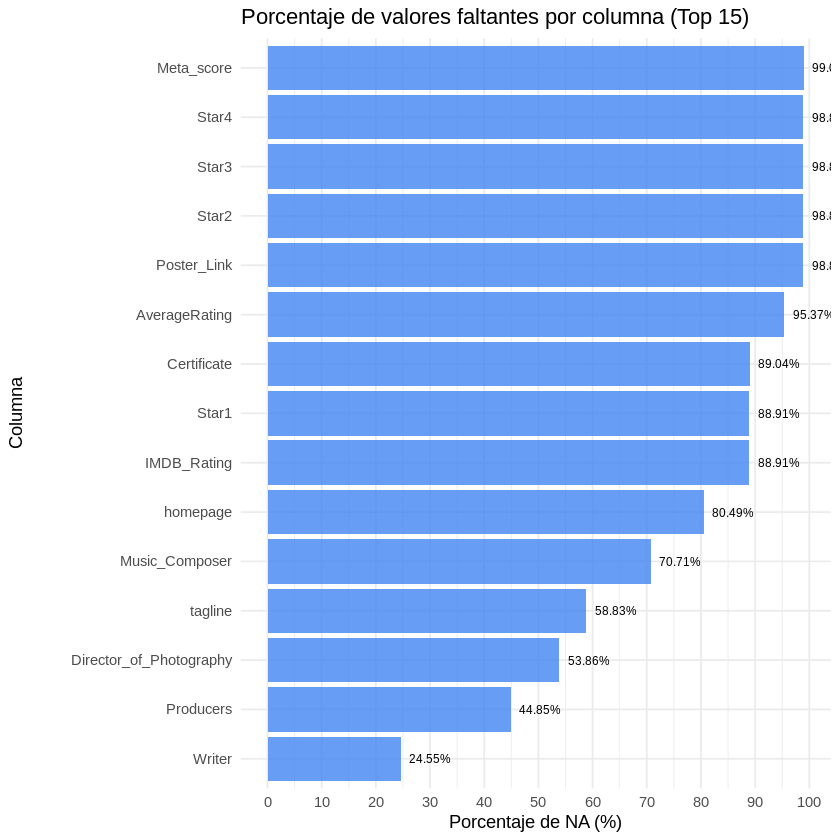

In [6]:
valores_na <- data.frame(
  Columna = names(movies),
  NA_Count = sapply(movies, function(x) sum(is.na(x))),
  NA_Porcentaje = sapply(movies, function(x) round(sum(is.na(x))/length(x)*100, 2))
)

valores_na <- valores_na[order(-valores_na$NA_Porcentaje), ]

print(valores_na)

total_na <- sum(is.na(movies))
total_valores <- nrow(movies) * ncol(movies)
# Crear visualización de valores faltantes
na_plot_data <- valores_na %>%
  filter(NA_Porcentaje > 0) %>%
  head(15)

ggplot(na_plot_data, aes(x = reorder(Columna, NA_Porcentaje), y = NA_Porcentaje)) +
  geom_bar(stat = "identity", fill = "#4285F4", alpha = 0.8) + # Color modificado
  geom_text(aes(label = paste0(NA_Porcentaje, "%")), hjust = -0.2, size = 2.5) + # Modificación aquí
  coord_flip() +
  scale_y_continuous(breaks = seq(0, 100, by = 10)) +
  labs(title = "Porcentaje de valores faltantes por columna (Top 15)",
       x = "Columna", y = "Porcentaje de NA (%)") +
  theme_minimal()

cat("Descripción:\n")
cat("Esta gráfica permite visualizar rápidamente qué columnas tienen más datos faltantes.\n")
cat("Es crucial para decidir qué columnas usar en modelos de ML.\n\n")


cat("\nTotal de valores faltantes:", total_na, "\n")
cat("Porcentaje total de NA:", round(total_na/total_valores*100, 2), "%\n\n")

In [7]:
# ============================================
# 5. ESTADÍSTICAS DESCRIPTIVAS
# ============================================

cat("============================================================\n")
cat("                 5. ESTADÍSTICAS DESCRIPTIVAS               \n")
cat("============================================================\n\n")

cat("Presupuesto (Budget):\n")
cat(paste(" Media:", scales::dollar(mean(movies$budget, na.rm = TRUE)), "\n"))
cat(paste(" Mediana:", scales::dollar(median(movies$budget, na.rm = TRUE)), "\n"))
cat(paste(" Desv. Estándar:", scales::dollar(sd(movies$budget, na.rm = TRUE)), "\n"))
cat(paste(" Mínimo:", scales::dollar(min(movies$budget, na.rm = TRUE)), "\n"))
cat(paste(" Máximo:", scales::dollar(max(movies$budget, na.rm = TRUE)), "\n\n"))

cat("Ingresos (Revenue):\n")
cat(paste(" Media:", scales::dollar(mean(movies$revenue, na.rm = TRUE)), "\n"))
cat(paste(" Mediana:", scales::dollar(median(movies$revenue, na.rm = TRUE)), "\n"))
cat(paste(" Desv. Estándar:", scales::dollar(sd(movies$revenue, na.rm = TRUE)), "\n"))
cat(paste(" Mínimo:", scales::dollar(min(movies$revenue, na.rm = TRUE)), "\n"))
cat(paste(" Máximo:", scales::dollar(max(movies$revenue, na.rm = TRUE)), "\n\n"))

cat("Calificación (vote_average):\n")
cat(paste(" Media:", round(mean(movies$vote_average, na.rm = TRUE), 2), "\n"))
cat(paste(" Mediana:", round(median(movies$vote_average, na.rm = TRUE), 2), "\n"))
cat(paste(" Desv. Estándar:", round(sd(movies$vote_average, na.rm = TRUE), 2), "\n\n"))

cat("Duración (runtime):\n")
cat(paste(" Media:", round(mean(movies$runtime, na.rm = TRUE), 2), "minutos\n"))
cat(paste(" Mediana:", round(median(movies$runtime, na.rm = TRUE), 2), "minutos\n"))
cat(paste(" Desv. Estándar:", round(sd(movies$runtime, na.rm = TRUE), 2), "minutos\n\n"))


                 5. ESTADÍSTICAS DESCRIPTIVAS               

Presupuesto (Budget):
 Media: $2,687,934 
 Mediana: $0 
 Desv. Estándar: $14,255,417 
 Mínimo: $0 
 Máximo: $460,000,000 

Ingresos (Revenue):
 Media: $7,148,835 
 Mediana: $0 
 Desv. Estándar: $53,897,852 
 Mínimo: $0 
 Máximo: $2,923,706,026 

Calificación (vote_average):
 Media: 6.05 
 Mediana: 6.14 
 Desv. Estándar: 1.07 

Duración (runtime):
 Media: 90.29 minutos
 Mediana: 93 minutos
 Desv. Estándar: 33.72 minutos



## Feature Engineering

In [8]:
# ============================================
# 6. FEATURE ENGINEERING
# ============================================

cat("============================================================\n")
cat("                    6. FEATURE ENGINEERING                  \n")
cat("============================================================\n\n")

movies <- movies %>%
  mutate(
    roi = ifelse(budget > 0, round((revenue - budget) / budget * 100, 2), NA),
    profit = revenue - budget,
    is_profitable = ifelse(profit > 0, "Sí", "No"),
    rating_category = case_when(
      vote_average >= 8 ~ "Excelente",
      vote_average >= 7 ~ "Buena",
      vote_average >= 5 ~ "Regular",
      vote_average >= 3 ~ "Mala",
      TRUE ~ "Muy Mala"
    ),
    decade = paste0(floor(release_year / 10) * 10, "s"),
    runtime_category = case_when(
      runtime < 90 ~ "Corta (<90 min)",
      runtime <= 120 ~ "Estándar (90-120 min)",
      runtime <= 150 ~ "Larga (120-150 min)",
      TRUE ~ "Muy Larga (>150 min)"
    ),
    budget_category = case_when(
      budget == 0 ~ "Desconocido",
      budget < 1e6 ~ "Bajo (<$1M)",
      budget < 15e6 ~ "Medio ($1M-$15M)",
      budget < 50e6 ~ "Alto ($15M-$50M)",
      budget < 100e6 ~ "Blockbuster ($50M-$100M)",
      TRUE ~ "Mega Producción (>$100M)"
    )
  )

cat("Columnas nuevas creadas: roi, profit, is_profitable, rating_category, decade, runtime_category, budget_category\n\n")

cat("Distribución de rating_category:\n")
print(table(movies$rating_category))
cat("\nDistribución de runtime_category:\n")
print(table(movies$runtime_category))
cat("\nDistribución de budget_category:\n")
print(table(movies$budget_category))
cat("\nEjemplo de datos con nuevas columnas:\n")
print(head(movies %>% select(title, release_year, budget, revenue, roi, profit, is_profitable,
                             rating_category, decade, runtime_category, budget_category), 10))
cat("\n")


                    6. FEATURE ENGINEERING                  

Columnas nuevas creadas: roi, profit, is_profitable, rating_category, decade, runtime_category, budget_category

Distribución de rating_category:

    Buena Excelente      Mala  Muy Mala   Regular 
    16771      2076     14078       788     65282 

Distribución de runtime_category:

      Corta (<90 min) Estándar (90-120 min)   Larga (120-150 min) 
                37270                 49599                  7441 
 Muy Larga (>150 min) 
                 4685 

Distribución de budget_category:

        Alto ($15M-$50M)              Bajo (<$1M) Blockbuster ($50M-$100M) 
                    3105                     3359                      969 
             Desconocido         Medio ($1M-$15M) Mega Producción (>$100M) 
                   83636                     7406                      520 

Ejemplo de datos con nuevas columnas:
# A tibble: 10 × 11
   title release_year budget revenue    roi profit is_profitable rating_cat

Descripción:
Muestra qué porcentaje de películas fueron rentables.
Es una visualización clave sobre el riesgo de la industria cinematográfica.



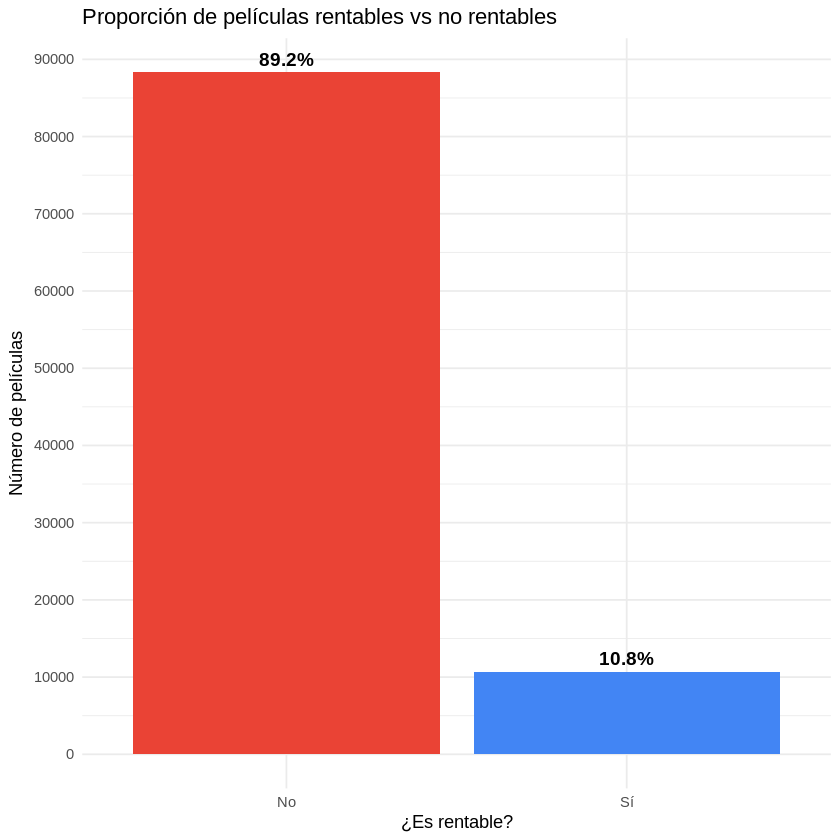

In [9]:
# GRÁFICA ADICIONAL: Películas rentables vs no rentables

rentabilidad_general <- movies %>%
  filter(!is.na(is_profitable)) %>%
  count(is_profitable) %>%
  mutate(porcentaje = round(n / sum(n) * 100, 1))

ggplot(rentabilidad_general, aes(x = is_profitable, y = n, fill = is_profitable)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = paste0(porcentaje, "%")),
            vjust = -0.5, size = 4, fontface = "bold") +
  scale_y_continuous(breaks = seq(0, max(rentabilidad_general$n) + 10000, by = 10000)) +
  scale_fill_manual(values = c("Sí" = "#4285F4", "No" = "#EA4335")) + # Colores modificados
  labs(title = "Proporción de películas rentables vs no rentables",
       x = "¿Es rentable?", y = "Número de películas") +
  theme_minimal()

cat("Descripción:\n")
cat("Muestra qué porcentaje de películas fueron rentables.\n")
cat("Es una visualización clave sobre el riesgo de la industria cinematográfica.\n\n")

## Visualizaciones

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”



Descripción gráfica 1:
Esta gráfica muestra cómo se distribuyen las calificaciones de las películas.
Permite ver qué tan comunes son las películas con baja, media y alta puntuación.
Es útil para entender la calidad general del catálogo y para modelos que predigan calificaciones.



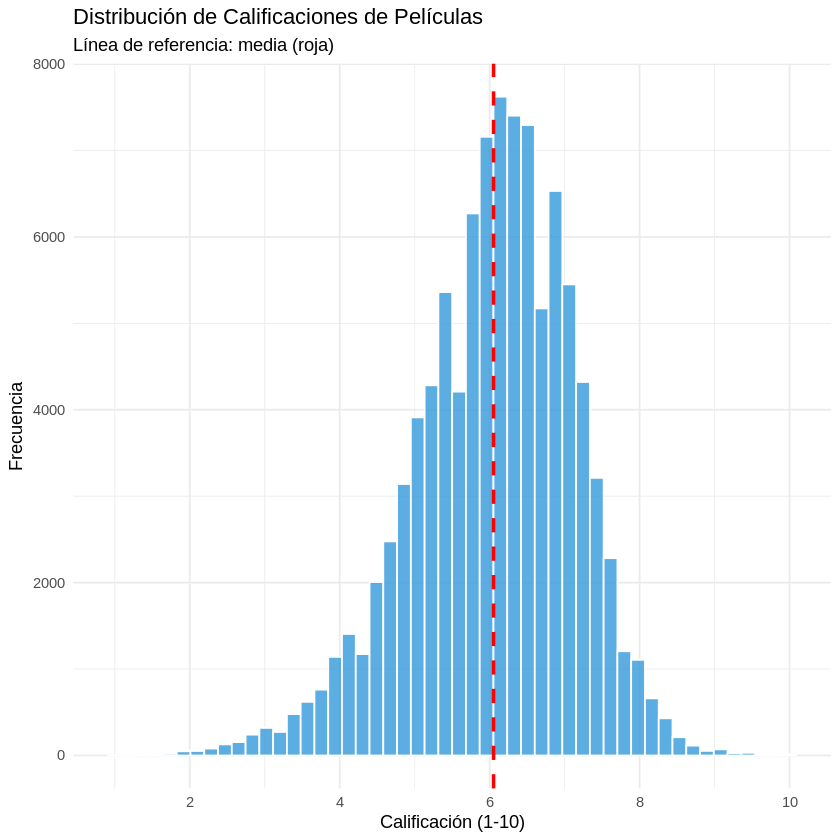

In [10]:
# ------------------------------------------------
# Gráfica 1: Distribución de calificaciones
# ------------------------------------------------
ggplot(movies, aes(x = vote_average)) +
  geom_histogram(bins = 50, fill = "#3498db", color = "white", alpha = 0.8) + # Color modificado
  geom_vline(aes(xintercept = mean(vote_average, na.rm = TRUE)),
             color = "red", linetype = "dashed", size = 1) +
  scale_x_continuous(breaks = seq(0, 10, by = 2)) +
  labs(title = "Distribución de Calificaciones de Películas",
       subtitle = "Línea de referencia: media (roja)",
       x = "Calificación (1-10)", y = "Frecuencia") +
  theme_minimal()

cat("\nDescripción gráfica 1:\n")
cat("Esta gráfica muestra cómo se distribuyen las calificaciones de las películas.\n")
cat("Permite ver qué tan comunes son las películas con baja, media y alta puntuación.\n")
cat("Es útil para entender la calidad general del catálogo y para modelos que predigan calificaciones.\n\n")

`geom_smooth()` using formula = 'y ~ x'


Descripción gráfica 2:
Esta gráfica muestra la relación entre presupuesto e ingresos de las películas.
Se observa una correlación positiva (coeficiente: 0.725), es decir, normalmente más presupuesto implica más ingresos.
Es relevante para analizar la rentabilidad y para construir modelos que predigan ingresos.



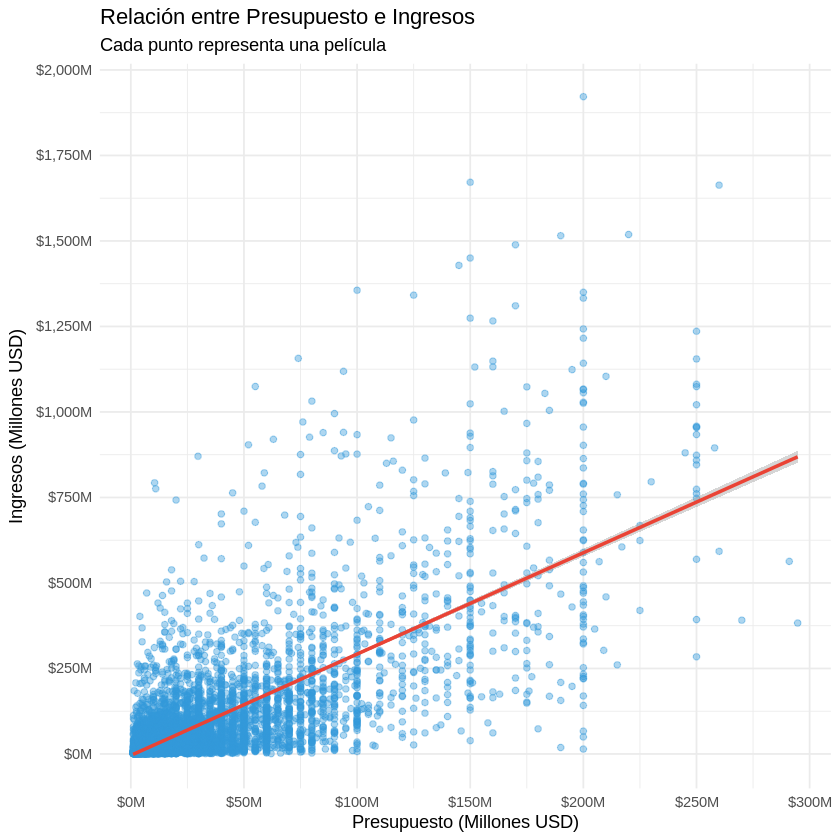

In [11]:
# ------------------------------------------------
# Gráfica 2: Presupuesto vs Ingresos
# ------------------------------------------------

movies_filtered <- movies %>%
  filter(budget > 1e6, revenue > 1e6, budget < 3e8, revenue < 2e9)

ggplot(movies_filtered, aes(x = budget, y = revenue)) +
  geom_point(alpha = 0.4, color = "#3498db", size = 1.5) + # Color modificado
  geom_smooth(method = "lm", se = TRUE, color = "#EA4335", size = 1) + # Color modificado
  scale_x_continuous(
    labels = dollar_format(scale = 1e-6, suffix = "M"),
    breaks = seq(0, 300, by = 50) * 1e6
  ) +
  scale_y_continuous(
    labels = dollar_format(scale = 1e-6, suffix = "M"),
    breaks = seq(0, 2000, by = 250) * 1e6
  ) +
  labs(title = "Relación entre Presupuesto e Ingresos",
       subtitle = "Cada punto representa una película",
       x = "Presupuesto (Millones USD)", y = "Ingresos (Millones USD)") +
  theme_minimal()

cor_value <- cor(movies_filtered$budget, movies_filtered$revenue, use = "complete.obs")

cat("Descripción gráfica 2:\n")
cat("Esta gráfica muestra la relación entre presupuesto e ingresos de las películas.\n")
cat("Se observa una correlación positiva (coeficiente: ")
cat(round(cor_value, 3))
cat("), es decir, normalmente más presupuesto implica más ingresos.\n")
cat("Es relevante para analizar la rentabilidad y para construir modelos que predigan ingresos.\n\n")

Descripción gráfica 3:
Esta gráfica muestra los géneros de películas más frecuentes tras limpiar y normalizar los datos.
Ayuda a entender qué tipo de contenido domina en el dataset.
Es útil para segmentar el catálogo y crear variables para modelos de recomendación.



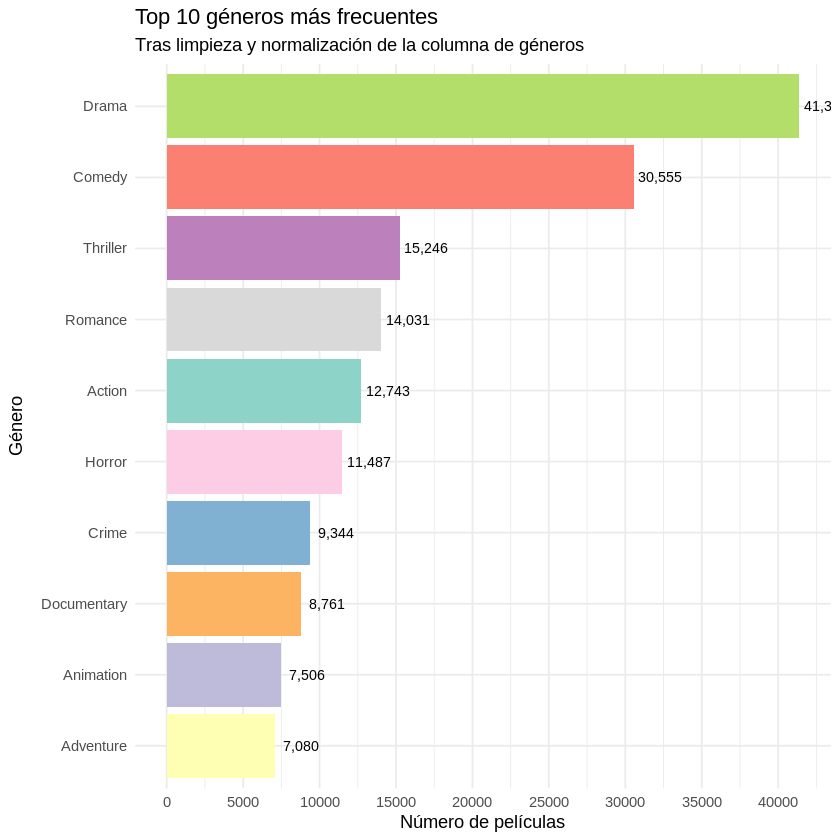

In [12]:
# ------------------------------------------------
# Gráfica 3: Top 10 géneros
# ------------------------------------------------

generos_separados <- movies %>%
  filter(!is.na(genres_list_clean)) %>%
  mutate(genre_split = str_split(genres_list_clean, "\\|")) %>%
  unnest(genre_split) %>%
  mutate(genre_split = str_trim(genre_split)) %>%
  filter(genre_split != "")

top_generos <- generos_separados %>%
  count(genre_split, sort = TRUE) %>%
  head(10)

ggplot(top_generos, aes(x = reorder(genre_split, n), y = n, fill = genre_split)) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  geom_text(aes(label = format(n, big.mark = ",")), hjust = -0.1, size = 3) +
  coord_flip() +
  scale_y_continuous(breaks = seq(0, max(top_generos$n) + 5000, by = 5000)) +
  labs(title = "Top 10 géneros más frecuentes",
       subtitle = "Tras limpieza y normalización de la columna de géneros",
       x = "Género", y = "Número de películas") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

cat("Descripción gráfica 3:\n")
cat("Esta gráfica muestra los géneros de películas más frecuentes tras limpiar y normalizar los datos.\n")
cat("Ayuda a entender qué tipo de contenido domina en el dataset.\n")
cat("Es útil para segmentar el catálogo y crear variables para modelos de recomendación.\n\n")

Descripción gráfica 4:
Esta gráfica muestra cómo ha evolucionado el número de películas producidas cada año.
Permite detectar periodos de crecimiento o descenso en la producción.
Es útil para análisis temporales y para entender la distribución temporal del dataset.



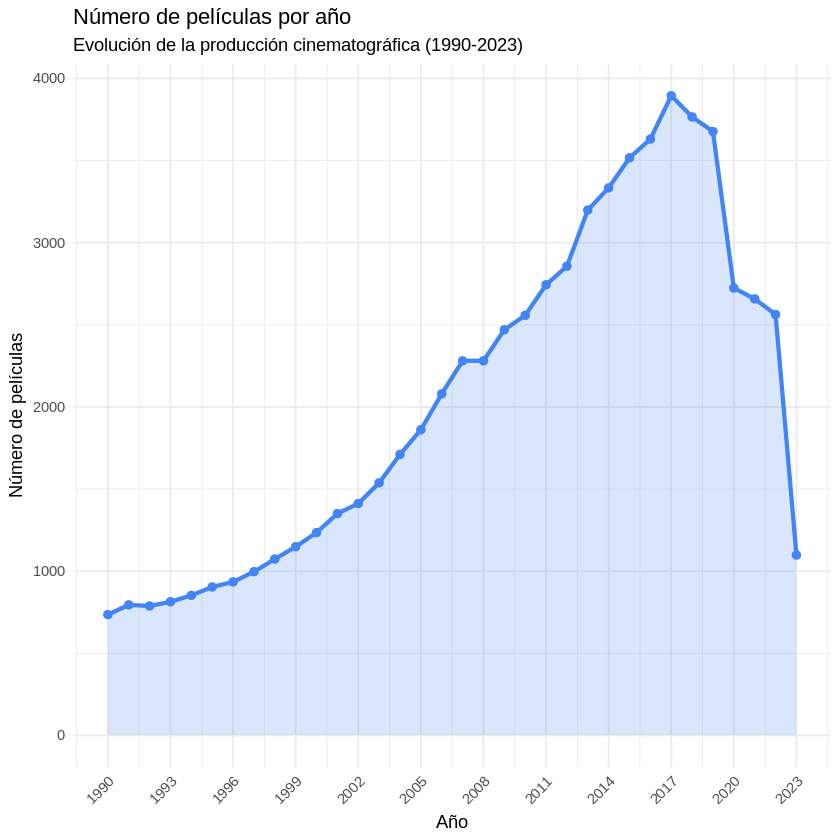

In [13]:
# ------------------------------------------------
# Gráfica 4: Películas por año
# ------------------------------------------------

peliculas_por_año <- movies %>%
  filter(release_year >= 1990, release_year <= 2023) %>%
  count(release_year)

ggplot(peliculas_por_año, aes(x = release_year, y = n)) +
  geom_line(color = "#4285F4", size = 1.2) + # Color modificado
  geom_point(color = "#4285F4", size = 2) + # Color modificado
  geom_area(fill = "#4285F4", alpha = 0.2) + # Color modificado
  scale_x_continuous(breaks = seq(1990, 2023, by = 3)) +
  scale_y_continuous(breaks = seq(0, max(peliculas_por_año$n) + 500, by = 1000)) +
  labs(title = "Número de películas por año",
       subtitle = "Evolución de la producción cinematográfica (1990-2023)",
       x = "Año", y = "Número de películas") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

cat("Descripción gráfica 4:\n")
cat("Esta gráfica muestra cómo ha evolucionado el número de películas producidas cada año.\n")
cat("Permite detectar periodos de crecimiento o descenso en la producción.\n")
cat("Es útil para análisis temporales y para entender la distribución temporal del dataset.\n\n")

Descripción gráfica 5:
Esta matriz muestra la correlación entre variables numéricas importantes.
Permite identificar relaciones fuertes entre variables.
Es muy útil para selección de variables y para evitar multicolinealidad en modelos.



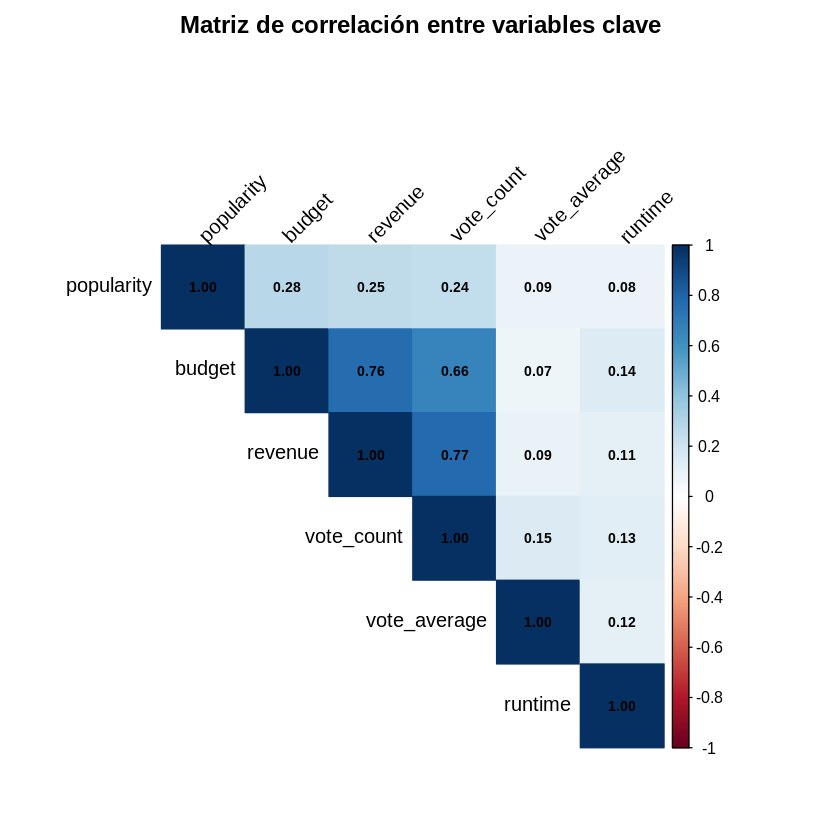

In [14]:
# ------------------------------------------------
# Gráfica 5: Matriz de correlación
# ------------------------------------------------

datos_cor <- movies %>%
  select(budget, revenue, popularity, vote_average, vote_count, runtime) %>%
  filter(complete.cases(.))

matriz_cor <- cor(datos_cor)

corrplot(matriz_cor,
         method = "color",
         type = "upper",
         order = "hclust",
         addCoef.col = "black",
         tl.col = "black",
         tl.srt = 45,
         number.cex = 0.7,
         title = "Matriz de correlación entre variables clave",
         mar = c(0, 0, 2, 0))

cat("Descripción gráfica 5:\n")
cat("Esta matriz muestra la correlación entre variables numéricas importantes.\n")
cat("Permite identificar relaciones fuertes entre variables.\n")
cat("Es muy útil para selección de variables y para evitar multicolinealidad en modelos.\n\n")

Descripción gráfica 6:
Esta gráfica muestra cómo varía el retorno de inversión según el rango de presupuesto.
Permite observar en qué niveles de inversión suele ser más rentable producir películas.
Es relevante para análisis financieros y decisiones de inversión en futuros proyectos.



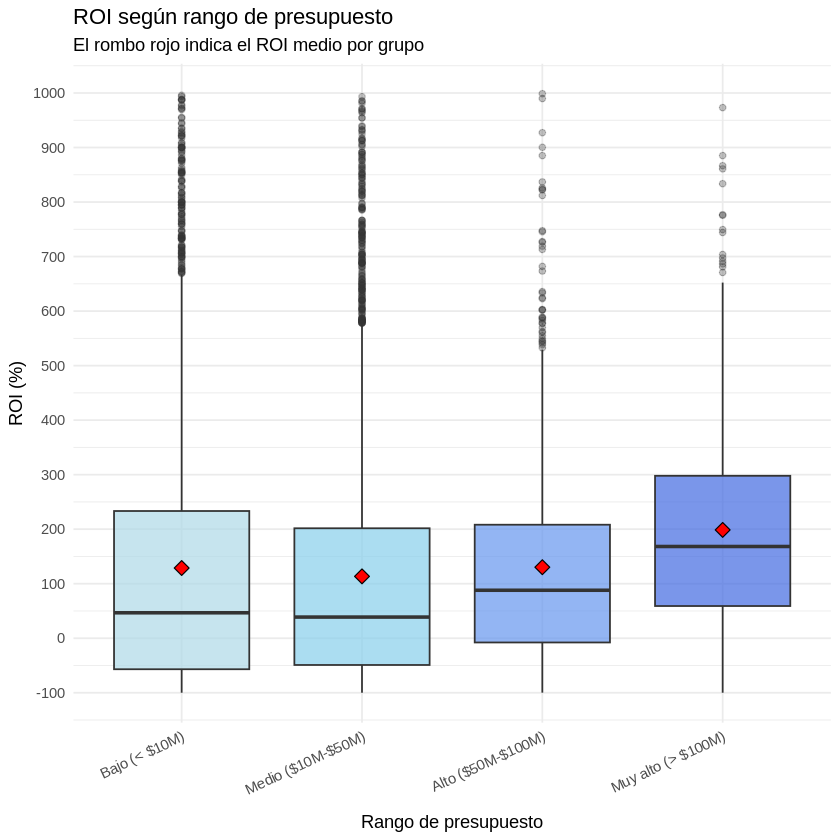

In [15]:
# ------------------------------------------------
# Gráfica 6: ROI por rango de presupuesto
# ------------------------------------------------

movies_roi <- movies %>%
  filter(budget > 1e6, revenue > 0) %>%
  mutate(
    roi = ((revenue - budget) / budget) * 100,
    budget_range = case_when(
      budget < 10e6 ~ "Bajo (< $10M)",
      budget < 50e6 ~ "Medio ($10M-$50M)",
      budget < 100e6 ~ "Alto ($50M-$100M)",
      TRUE ~ "Muy alto (> $100M)"
    )
  ) %>%
  filter(roi > -100, roi < 1000)

movies_roi$budget_range <- factor(
  movies_roi$budget_range,
  levels = c("Bajo (< $10M)", "Medio ($10M-$50M)", "Alto ($50M-$100M)", "Muy alto (> $100M)")
)

ggplot(movies_roi, aes(x = budget_range, y = roi, fill = budget_range)) +
  geom_boxplot(alpha = 0.7, outlier.alpha = 0.3, show.legend = FALSE) +
  stat_summary(fun = mean, geom = "point", shape = 23, size = 3, fill = "red") +
  scale_fill_manual(values = c("#ADD8E6", "#87CEEB", "#6495ED", "#4169E1")) + # Colores para los boxplots
  scale_y_continuous(breaks = seq(-100, 1000, by = 100)) +
  labs(title = "ROI según rango de presupuesto",
       subtitle = "El rombo rojo indica el ROI medio por grupo",
       x = "Rango de presupuesto", y = "ROI (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 25, hjust = 1))

cat("Descripción gráfica 6:\n")
cat("Esta gráfica muestra cómo varía el retorno de inversión según el rango de presupuesto.\n")
cat("Permite observar en qué niveles de inversión suele ser más rentable producir películas.\n")
cat("Es relevante para análisis financieros y decisiones de inversión en futuros proyectos.\n\n")

## Resumen Final

In [16]:
cat("============================================================\n")
cat("                    8. RESUMEN FINAL                        \n")
cat("============================================================\n\n")

cat("INSIGHTS PRINCIPALES DEL ANÁLISIS:\n\n")

rentables_pct <- sum(movies$is_profitable == "Sí", na.rm = TRUE) / sum(!is.na(movies$is_profitable)) * 100
movies_con_presupuesto <- sum(movies$budget > 0, na.rm = TRUE)
genero_top <- movies %>%
  filter(!is.na(genres_list_clean)) %>%
  mutate(genre = str_split(genres_list_clean, "\\|")) %>%
  unnest(genre) %>%
  count(genre, sort = TRUE) %>%
  head(1)

cat("1. RENTABILIDAD:\n")
cat(paste("   Solo el", round(rentables_pct, 1), "% de películas fueron rentables.\n"))
cat("   Esto sugiere alto riesgo financiero en la industria cinematográfica.\n\n")

cat("2. PRESUPUESTO Y DATOS:\n")
cat(paste("   De", nrow(movies), "películas, solo", movies_con_presupuesto,
          "tienen presupuesto registrado.\n"))
cat("   Esto implica que la mayoría de películas (posiblemente directas a streaming o bajo presupuesto)\n")
cat("   no tienen datos financieros públicos.\n\n")

cat("3. GÉNEROS MÁS COMUNES:\n")
cat(paste("   El género más frecuente es:", genero_top$genre[1],
          "con", genero_top$n[1], "películas.\n\n"))

cat("4. CORRELACIÓN PRESUPUESTO-INGRESOS:\n")
movies_cor <- movies %>%
  filter(budget > 1e6, revenue > 0) %>%
  select(budget, revenue)
cor_final <- cor(movies_cor$budget, movies_cor$revenue, use = "complete.obs")
cat(paste("   Correlación:", round(cor_final, 3),
          "(correlación positiva fuerte)\n"))
cat("   Las películas con presupuestos más altos tienden a generar mayores ingresos.\n\n")

cat("5. CALIDAD DEL DATASET:\n")
cat(paste("   Películas con año registrado:", sum(!is.na(movies$release_year)), "\n"))
cat(paste("   Películas en últimos 10 años:", sum(movies$release_year >= 2014, na.rm = TRUE), "\n"))
cat("   El dataset está fuertemente centrado en películas recientes.\n\n")

cat("============================================================\n")
cat("FIN DEL ANÁLISIS EXPLORATORIO DE DATOS\n")
cat("============================================================\n")

                    8. RESUMEN FINAL                        

INSIGHTS PRINCIPALES DEL ANÁLISIS:

1. RENTABILIDAD:
   Solo el 10.8 % de películas fueron rentables.
   Esto sugiere alto riesgo financiero en la industria cinematográfica.

2. PRESUPUESTO Y DATOS:
   De 98995 películas, solo 15359 tienen presupuesto registrado.
   Esto implica que la mayoría de películas (posiblemente directas a streaming o bajo presupuesto)
   no tienen datos financieros públicos.

3. GÉNEROS MÁS COMUNES:
   El género más frecuente es: Drama con 41378 películas.

4. CORRELACIÓN PRESUPUESTO-INGRESOS:
   Correlación: 0.732 (correlación positiva fuerte)
   Las películas con presupuestos más altos tienden a generar mayores ingresos.

5. CALIDAD DEL DATASET:
   Películas con año registrado: 98979 
   Películas en últimos 10 años: 30863 
   El dataset está fuertemente centrado en películas recientes.

FIN DEL ANÁLISIS EXPLORATORIO DE DATOS
